<a href="https://colab.research.google.com/github/rafaelvinisan/2020-2-exercicio-revisao-refatoracao/blob/master/Chess_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from scipy import stats

In [8]:
!pip install altair

In [10]:
import altair as alt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize']  = (16, 14)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/otavioml/Chess-Data-Analysis/main/Chess100k.csv')

In [4]:
#Limpeza dos dados
#Padronização do tipo da coluna Numer_of_Moves
df['Number_of_Moves'] =  pd.to_numeric(df['Number_of_Moves'], errors='coerce')

#Remoção das partidas com menos de 3 movimentos que foram abandonadas ou terminadas por tempo
condition = (df['Number_of_Moves'] >= 3) | (df['Termination'] == 'Normal')
df = df.loc[condition]

#limpeza das linhas nulas
df = df.dropna()


In [5]:
#Removing outliers using zscore
#df['IT_Zscore'] = stats.zscore(df['InitialTime'])
#df['Inc_Zscore'] = stats.zscore(df['Increment'])
#condition = (df['IT_Zscore'] <= 3) & (df['Inc_Zscore'] <= 3)
#df = df.loc[condition]
df

,Unnamed: 0,WhiteElo,BlackElo,WhiteName,BlackName,Winner,Termination,Site,Day,Month,Year,InitialTime,Increment,TimeControl,Opening,ECO,Number_of_Moves
0,0,1639,1403,BFG9k,mamalak,White,Normal,https://lichess.org/j1dkb5dw,31,12,2012,600,8,Rapid,French Defense: Normal Variation,C00,13
1,1,1654,1919,Desmond_Wilson,savinka59,White,Normal,https://lichess.org/a9tcp02g,31,12,2012,480,2,Rapid,"Queen's Pawn Game: Colle System, Anti-Colle",D04,18
2,2,1643,1747,Kozakmamay007,VanillaShamanilla,White,Normal,https://lichess.org/szom2tog,31,12,2012,420,17,Rapid,Four Knights Game: Italian Variation,C50,11
3,3,1824,1973,Naitero_Nagasaki,800,Black,Normal,https://lichess.org/rklpc7mk,31,12,2012,60,1,Bullet,Caro-Kann Defense: Goldman Variation,B12,47
4,4,1765,1815,nichiren1967,Naitero_Nagasaki,Black,Normal,https://lichess.org/1xb3os63,31,12,2012,60,1,Bullet,French Defense: La Bourdonnais Variation,C00,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1636,1492,plateado,jakethedog,White,Time forfeit,https://lichess.org/m8pyxf28,26,1,2013,120,0,Bullet,Englund Gambit Complex: Felbecker Gambit,A40,46
99996,99996,1231,1425,javloon,Robin_Hood,Black,Normal,https://lichess.org/flqne29f,26,1,2013,120,0,Bullet,Sicilian Defense,B20,34
99997,99997,1307,1605,rookplays,castulo,Black,Time forfeit,https://lichess.org/w5w29s2x,26,1,2013,480,14,Rapid,Grob Opening,A00,16
99998,99998,1020,1653,kramer,cyberpunk,Black,Normal,https://lichess.org/gfobb2s5,26,1,2013,180,1,Blitz,Van't Kruijs Opening,A00,57


In [6]:
#Adição das colunas média e razão
df['RatioElo'] = df['BlackElo']/df['WhiteElo']
df['MatchElo'] = (df['BlackElo']+df['WhiteElo'])/2

#Colunas de interesse
df = df[['WhiteElo','BlackElo','RatioElo','MatchElo','Winner','InitialTime','Increment','TimeControl','Opening','ECO','Number_of_Moves', 'Site']]
df.shape

(99569, 12)

In [7]:
df.head()

,WhiteElo,BlackElo,RatioElo,MatchElo,Winner,InitialTime,Increment,TimeControl,Opening,ECO,Number_of_Moves,Site
0,1639,1403,0.856010,1521.0,White,600,8,Rapid,French Defense: Normal Variation,C00,13,https://lichess.org/j1dkb5dw
1,1654,1919,1.160218,1786.5,White,480,2,Rapid,"Queen's Pawn Game: Colle System, Anti-Colle",D04,18,https://lichess.org/a9tcp02g
2,1643,1747,1.063299,1695.0,White,420,17,Rapid,Four Knights Game: Italian Variation,C50,11,https://lichess.org/szom2tog
3,1824,1973,1.081689,1898.5,Black,60,1,Bullet,Caro-Kann Defense: Goldman Variation,B12,47,https://lichess.org/rklpc7mk
4,1765,1815,1.028329,1790.0,Black,60,1,Bullet,French Defense: La Bourdonnais Variation,C00,23,https://lichess.org/1xb3os63


In [11]:
#Short description of the dataframe
df.describe().apply(lambda x: x.apply('{0:.2f}'.format))

,WhiteElo,BlackElo,RatioElo,MatchElo,InitialTime,Increment,Number_of_Moves
count,99569.00,99569.00,99569.00,99569.00,99569.00,99569.00,99569.00
mean,1606.69,1596.46,1.00,1601.58,300.89,2.91,34.01
std,202.38,207.59,0.13,178.19,288.00,4.39,16.23
min,782.00,789.00,0.43,974.50,0.00,0.00,1.00
25%,1476.00,1464.00,0.92,1478.50,120.00,0.00,23.00
50%,1602.00,1589.00,1.00,1594.00,240.00,1.00,32.00
75%,1740.00,1733.00,1.07,1720.00,360.00,5.00,43.00
max,2403.00,2386.00,2.34,2264.00,1800.00,30.00,153.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9198db8a50>,
      dtype=object)

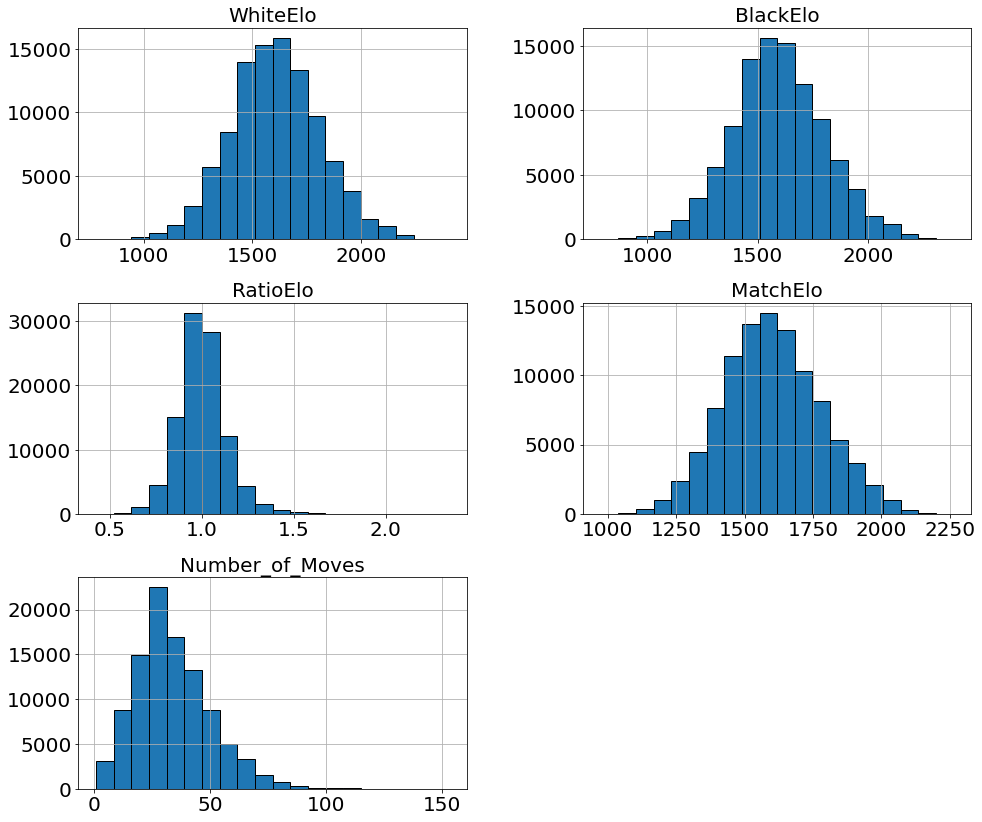

In [12]:
df.hist(bins=20, column=['WhiteElo', 'BlackElo', 'RatioElo', 'MatchElo', 'Number_of_Moves'],edgecolor='black',)

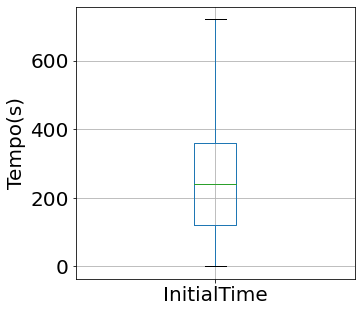

In [13]:
df.boxplot(column=['InitialTime'], showfliers=False, figsize=(5,5))
plt.ylabel('Tempo(s)')
plt.show()

In [14]:
#Removing outliers using zscore
df['IT_Zscore'] = stats.zscore(df['InitialTime'])
df['Inc_Zscore'] = stats.zscore(df['Increment'])
condition = (df['IT_Zscore'] <= 3) & (df['Inc_Zscore'] <= 3)
df = df.loc[condition]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


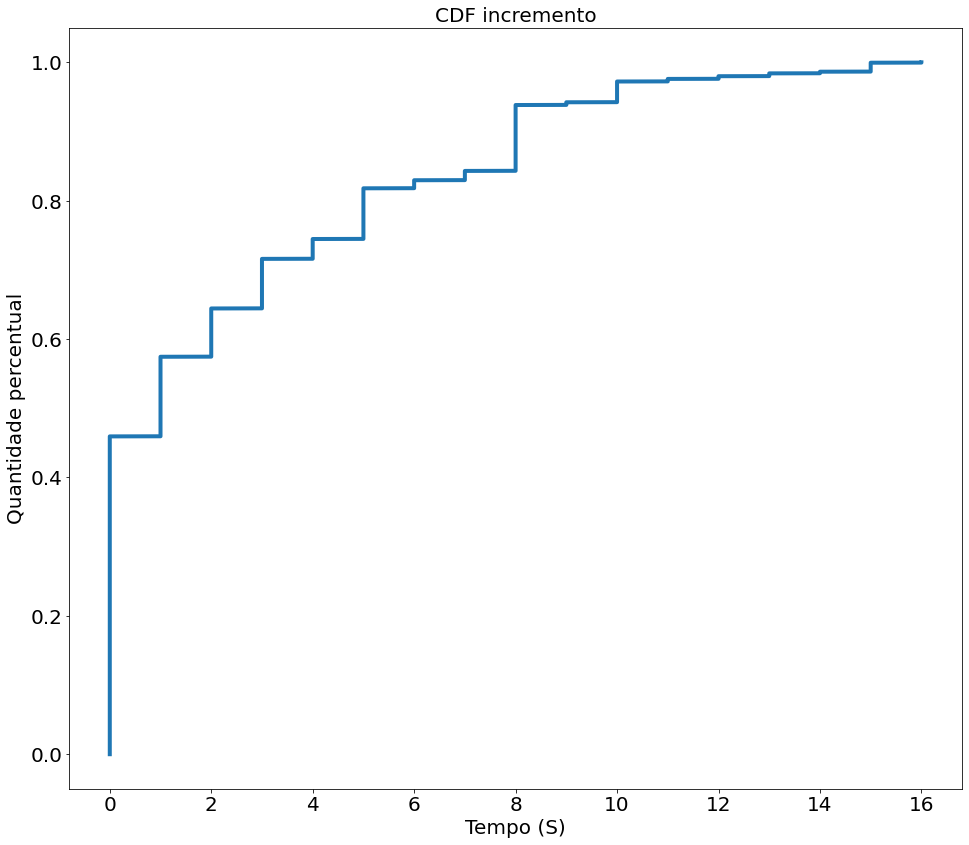

In [15]:
from statsmodels.distributions.empirical_distribution import ECDF
cdf = ECDF(df['Increment'])
plt.title('CDF incremento')
plt.ylabel('Quantidade percentual')
plt.xlabel("Tempo (S)")
plt.plot(cdf.x,cdf.y)
plt.show()

In [16]:
#10 most frequent opening
df_countWhiteWins = df.groupby(['ECO']).count().sort_values('Winner', ascending=False)['Winner'][0:10]
df_countWhiteWins

ECO
A00    7657
B00    4899
C00    4882
A40    4795
D00    4125
B01    3995
C41    3655
C20    3619
B20    2684
D02    1999
Name: Winner, dtype: int64

In [17]:
#Average moves per
df_averageMovesPerGame = df['Number_of_Moves'].mean()
df_averageMovesPerGame

34.074715034528666

<BarContainer object of 3 artists>

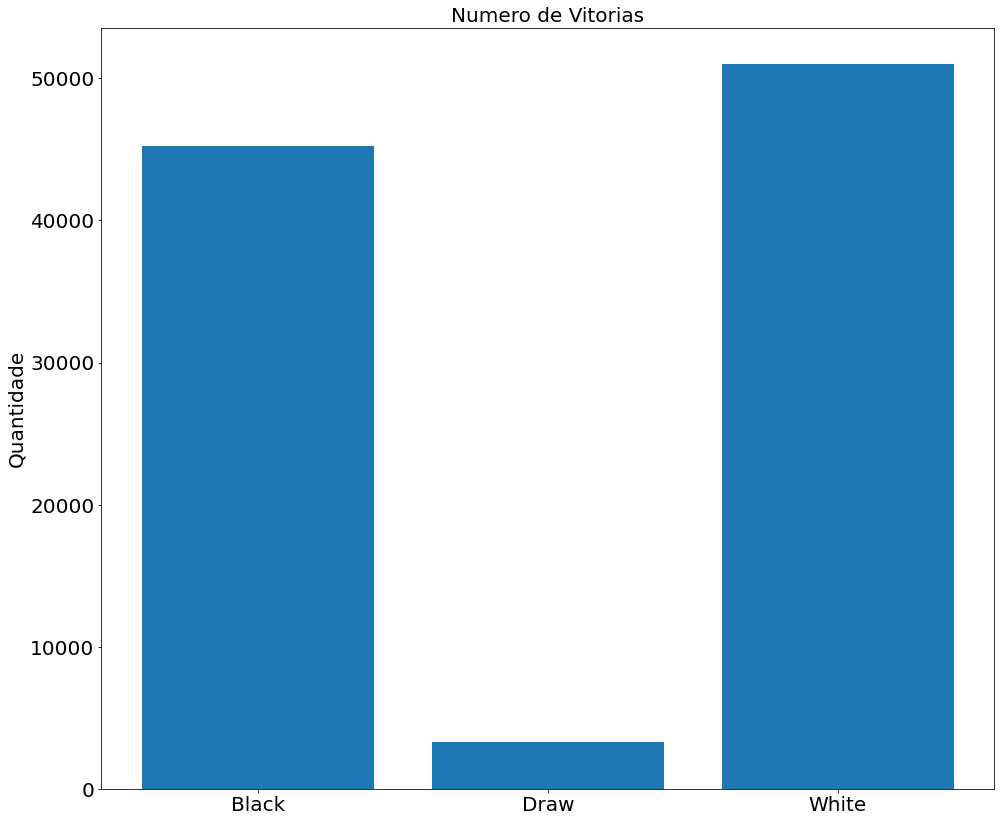

In [15]:
df_winner = df.groupby('Winner').count()['ECO']
plt.ylabel('Quantidade')
plt.title('Numero de Vitorias')
plt.bar(x = df_winner.index,height=df_winner)

In [ ]:
plt.ylabel('Quantidade em milhões')
plt.title('Numero de Vitorias')
plt.bar(x = df_winner.index,height=df_winner)

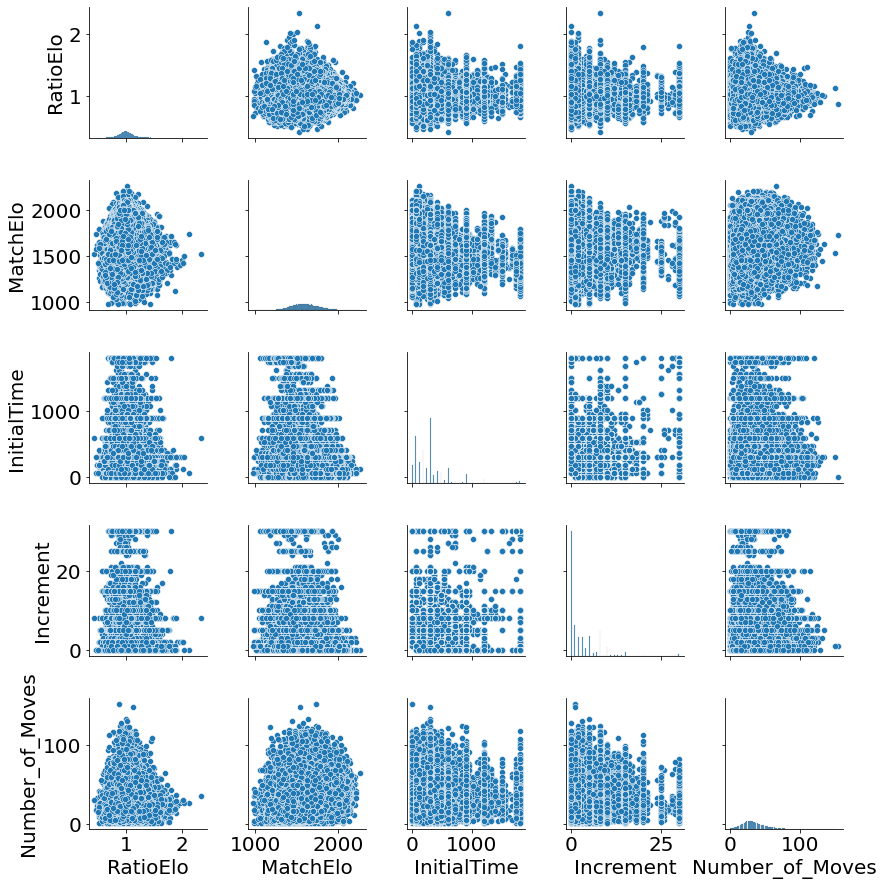

In [14]:
sns.pairplot(df[['RatioElo', 'MatchElo', 'InitialTime','Increment', 'Number_of_Moves']])